In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'Elile_Assessment/Part_Two'
FOLDERNAME = 'Elile_Assessment/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))
%cd /content/drive/My\ Drive/$FOLDERNAME

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Elile_Assessment


In [3]:
train_dataframe = pd.read_csv('weather_train.csv', sep=";", engine='python', header = None)
dev_dataframe = pd.read_csv('weather_dev.csv', sep=";", engine='python', header = None)
test_dataframe = pd.read_csv('weather_test.csv', sep=";", engine='python', header = None)


In [4]:
train_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,12,2,1,2017,1.00,1.85,6.97,6.90,98.24,10.92,29.18,29.97,449.25
1,9,7,2,2016,0.00,10.00,3.96,-0.61,70.20,17.96,29.12,29.91,3165.50
2,9,22,2,2016,0.04,10.00,2.99,-1.34,71.04,10.57,29.37,30.17,2637.00
3,8,3,10,2017,1.00,10.00,21.60,17.14,72.80,11.84,29.53,30.33,710.25
4,7,27,2,2017,1.00,10.00,2.75,0.70,85.40,6.64,29.37,30.17,680.50


In [5]:
# Assign column names
train_dataframe.columns = ["Hour", "Day", "Month", "Year", "Cloud_Coverage", "Visibility", "Temperature", "Dew_Point",
                     "Relative_Humidity","Wind_Speed", "Station_Pressure", "Altimeter", "Solar_Energy"]
test_dataframe.columns = ["Hour", "Day", "Month", "Year", "Cloud_Coverage", "Visibility", "Temperature", "Dew_Point",
                     "Relative_Humidity","Wind_Speed", "Station_Pressure", "Altimeter", "Solar_Energy"]

In [6]:
train_dataframe.describe()

,Hour,Day,Month,Year,Cloud_Coverage,Visibility,Temperature,Dew_Point,Relative_Humidity,Wind_Speed,Station_Pressure,Altimeter,Solar_Energy
count,6028.000000,6028.000000,6028.000000,6028.000000,6028.000000,6028.000000,6028.000000,6028.000000,6028.000000,6028.000000,6028.000000,6028.000000,6028.000000
mean,11.491208,15.579628,6.233411,2016.476941,0.418603,9.226687,16.457271,9.932850,65.521432,10.051043,28.572450,30.022956,1796.393600
std,3.447262,8.805333,3.053219,0.499509,0.419157,1.990154,10.547814,9.581325,20.562583,5.627181,3.561521,0.243372,1489.498743
min,6.000000,1.000000,1.000000,2016.000000,0.000000,0.000000,-18.930000,-20.540000,15.600000,0.000000,8.500000,21.880000,0.000000
25%,9.000000,8.000000,4.000000,2016.000000,0.000000,10.000000,8.910000,3.325000,50.360000,6.120000,29.100000,29.910000,378.937500
50%,11.000000,16.000000,6.000000,2016.000000,0.290000,10.000000,18.615000,11.255000,67.060000,9.120000,29.230000,30.030000,1468.875000
75%,14.000000,23.000000,9.000000,2017.000000,0.920000,10.000000,25.092500,17.550000,82.250000,13.692500,29.340000,30.140000,3098.625000
max,17.000000,31.000000,12.000000,2017.000000,1.000000,10.000000,34.010000,27.060000,100.000000,41.560000,29.970000,30.780000,4733.250000


In [7]:
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hour               6028 non-null   int64  
 1   Day                6028 non-null   int64  
 2   Month              6028 non-null   int64  
 3   Year               6028 non-null   int64  
 4   Cloud_Coverage     6028 non-null   float64
 5   Visibility         6028 non-null   float64
 6   Temperature        6028 non-null   float64
 7   Dew_Point          6028 non-null   float64
 8   Relative_Humidity  6028 non-null   float64
 9   Wind_Speed         6028 non-null   float64
 10  Station_Pressure   6028 non-null   float64
 11  Altimeter          6028 non-null   float64
 12  Solar_Energy       6028 non-null   float64
dtypes: float64(9), int64(4)
memory usage: 612.3 KB


In [8]:
# Find the hours of the day for which data is recorded
train_dataframe['Hour'].unique()

array([12,  9,  8,  7,  6, 13, 10, 14, 17, 15, 16, 11])

In [9]:
# Create a copy of the training data
df_copy = deepcopy(train_dataframe)

# Create a copy of the test data

df_test = deepcopy(test_dataframe)

train_dataframe.head()


,Hour,Day,Month,Year,Cloud_Coverage,Visibility,Temperature,Dew_Point,Relative_Humidity,Wind_Speed,Station_Pressure,Altimeter,Solar_Energy
0,12,2,1,2017,1.00,1.85,6.97,6.90,98.24,10.92,29.18,29.97,449.25
1,9,7,2,2016,0.00,10.00,3.96,-0.61,70.20,17.96,29.12,29.91,3165.50
2,9,22,2,2016,0.04,10.00,2.99,-1.34,71.04,10.57,29.37,30.17,2637.00
3,8,3,10,2017,1.00,10.00,21.60,17.14,72.80,11.84,29.53,30.33,710.25
4,7,27,2,2017,1.00,10.00,2.75,0.70,85.40,6.64,29.37,30.17,680.50


In [10]:
# Create a datetime column using Hour, Year, Month and Date
train_dataframe['Timestamp'] = train_dataframe.iloc[:,3].astype(str) + "-" + train_dataframe.iloc[:,2].astype(str)+ "-" + train_dataframe.iloc[:,1].astype(str) + ' ' + train_dataframe.iloc[:,0].astype(str) + ":00" + ":00"

test_dataframe['Timestamp'] = test_dataframe.iloc[:,3].astype(str) + "-" + test_dataframe.iloc[:,2].astype(str)+ "-" +  test_dataframe.iloc[:,1].astype(str) + ' ' +  test_dataframe.iloc[:,0].astype(str) + ":00" + ":00"

# Convert timestamp values to datetime
train_dataframe['Timestamp'] = pd.to_datetime(train_dataframe['Timestamp'])

test_dataframe['Timestamp'] = pd.to_datetime(test_dataframe['Timestamp'])

# # Drop Year, Hour, Month and Day columns from the dataset
# train_dataframe.drop(['Hour', 'Month', 'Day', 'Year'], axis = 1, inplace = True)

# test_dataframe.drop(['Hour', 'Month', 'Day', 'Year'], axis = 1, inplace = True)

# Insert timestamp at first index
train_dataframe.insert(0, 'Timestamp', train_dataframe.pop('Timestamp'))

test_dataframe.insert(0, 'Timestamp', test_dataframe.pop('Timestamp'))

# Sort the dataframe by the 'date' column in ascending order
train_dataframe = train_dataframe.sort_values(by='Timestamp')

test_dataframe = test_dataframe.sort_values(by='Timestamp')

train_dataframe.head()

,Timestamp,Hour,Day,Month,Year,Cloud_Coverage,Visibility,Temperature,Dew_Point,Relative_Humidity,Wind_Speed,Station_Pressure,Altimeter,Solar_Energy
2792,2016-02-01 06:00:00,6,1,2,2016,0.00,9.92,0.37,-0.01,89.12,4.72,29.19,29.98,0.00
4682,2016-02-01 07:00:00,7,1,2,2016,0.00,10.00,0.47,-0.04,90.08,6.00,29.20,29.99,84.29
1947,2016-02-01 08:00:00,8,1,2,2016,0.14,9.92,0.89,0.30,92.00,2.76,29.22,30.01,531.00
1846,2016-02-01 09:00:00,9,1,2,2016,0.92,10.00,1.97,0.41,86.12,5.56,29.24,30.04,923.75
724,2016-02-01 10:00:00,10,1,2,2016,0.46,10.00,3.15,1.07,82.48,2.12,29.27,30.06,1947.75


In [11]:
train_dataframe.tail()

,Timestamp,Hour,Day,Month,Year,Cloud_Coverage,Visibility,Temperature,Dew_Point,Relative_Humidity,Wind_Speed,Station_Pressure,Altimeter,Solar_Energy
2580,2017-10-28 13:00:00,13,28,10,2017,1.0,10.0,4.50,0.85,75.68,14.64,29.14,29.93,945.75
1797,2017-10-28 14:00:00,14,28,10,2017,1.0,10.0,4.72,-0.50,69.04,12.76,29.14,29.93,728.50
4313,2017-10-28 15:00:00,15,28,10,2017,1.0,10.0,4.18,-0.04,74.60,12.16,29.14,29.93,338.50
81,2017-10-28 16:00:00,16,28,10,2017,1.0,10.0,3.77,0.00,75.64,8.28,29.16,29.95,126.78
3878,2017-10-28 17:00:00,17,28,10,2017,1.0,10.0,3.59,-0.79,73.72,8.40,29.18,29.97,20.49


In [13]:
# Import and pre-process data for future applications
def import_data(train_dataframe, dev_dataframe, test_dataframe):
    dataset = train_dataframe.iloc[:,1:].values
    dataset = dataset.astype('float32')

    # Include all 8 factors (Cloud Coverage ; Visibility ; Temperature ; Dew Point ;
    # Relative Humidity ; Wind Speed ; Station Pressure ; Altimeter
    max_test = np.max(dataset[:,:8])
    min_test = np.min(dataset[:,:8])
    scale_factor = max_test - min_test
    max = np.empty(8)
    min = np.empty(8)

    # Create training dataset
    for i in range(8):
      min[i] = np.amin(dataset[:,i],axis = 0)
      max[i] = np.amax(dataset[:,i],axis = 0)
      dataset[:,i] = normalize_data(dataset[:, i], min[i], max[i])

    train_data = dataset[:,:8]
    train_labels = dataset[:,8]

    # # Create dev dataset
    # dataset = dev_dataframe.values
    # # dataset = dataset.astype('float32')

    # for i in range(10):
    #   if i != 0 or i != 9:
    #     dataset[:,i] = normalize_data(dataset[:, i], min[i], max[i])

    # dev_data = dataset[:,0:9]
    # dev_labels = dataset[:,9]

    # Create test dataset
    dataset = test_dataframe.iloc[:,1:].values
    dataset = dataset.astype('float32')

    for i in range(8):
      dataset[:,i] = normalize_data(dataset[:, i], min[i], max[i])

    test_data = dataset[:, :8]
    test_labels = dataset[:, 8]

    # return train_data, train_labels, dev_data, dev_labels, test_data, test_labels, scale_factor
    return train_data, train_labels, test_data, test_labels, scale_factor

In [14]:
# Set y values of data to lie between 0 and 1
def normalize_data(dataset, data_min, data_max):
    data_std = (dataset - data_min) / (data_max - data_min)
    test_scaled = data_std * (np.amax(data_std) - np.amin(data_std)) + np.amin(data_std)
    return test_scaled

In [15]:
# train_data, train_labels, dev_data, dev_labels, test_data, test_labels, scale_factor = import_data(train_dataframe, dev_dataframe, test_dataframe)
train_data, train_labels, test_data, test_labels, scale_factor = import_data(train_dataframe, dev_dataframe, test_dataframe)
print(train_data.shape, train_labels.shape)

(6028, 8) (6028,)


## Current Best Model

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# Use a GPU if it is available
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

In [ ]:
# Reshape data for model training
X_train = train_data.reshape((-1, 1, 8))
X_test = test_data.reshape((-1, 1, 8))

y_train = train_labels.reshape((-1, 1))
y_test = test_labels.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Convert numpy arrays to PyTorch tensors
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from torch.utils.data import Dataset

# Create a dataset class to wrap PyTorch tensors
class BaseModelDataSet(Dataset):
  def __init__(self,X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.X)

  def __getitem__(self, i):
    return self.X[i], self.y[i]

train_dataset = BaseModelDataSet(X_train, y_train)
test_dataset = BaseModelDataSet(X_test, y_test)

In [ ]:
# Use a data loader class for wrapping datasets to get batches

from torch.utils.data import DataLoader

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False)

In [ ]:
# Sanity Check: See batch size
for _, batch in enumerate(train_loader):
  x_batch, y_batch = batch[0].to(device), batch[1].to(device)
  print(x_batch.shape, y_batch.shape)
  break

# Expected output: (batch_size, 1, num_features) and (batch_size, 1)

In [76]:
# To-do: Xavier Initialization for the model, dropout and activation function
# Create a LSTM model class
class LSTM(nn.Module):
  def __init__(self, input_size, hidden_size, num_stacked_layers):
    super().__init__()
    self.hidden_size = hidden_size
    self.num_stacked_layers = num_stacked_layers

    # Model architecture
    # self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, batch_first = True)
    # self.fc = nn.Linear(hidden_size, 1)

    self.lstm1 = nn.LSTM(input_size=8, hidden_size=hidden_size, num_layers=num_stacked_layers, batch_first=True)
    self.lstm2 = nn.LSTM(input_size=hidden_size, hidden_size=64, num_layers=num_stacked_layers, batch_first=True)

    self.fc1 = nn.Linear(64, 64)
    self.relu = nn.ReLU()

    self.fc2 = nn.Linear(64, 1)

  def forward(self,x):
    batch_size = x.size(0)
    h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
    c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

    # Forward pass through LSTM layer

    # out, _ = self.lstm(x, (h0, c0))
    # # Forward pass through FC layer
    # out = self.fc(out[:, -1, :])

    x, _ = self.lstm1(x, (h0, c0))
    x = nn.Dropout(0.2)(x)
    x = self.relu(x)

    x, _ = self.lstm2(x)
    x = nn.Dropout(0.2)(x)

    x = self.relu(self.fc1(x))
    out = self.fc2(x)
    return out

model = LSTM(8, 4, 1)
model.to(device)
model

LSTM(
  (lstm1): LSTM(8, 4, batch_first=True)
  (lstm2): LSTM(4, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
# To-do: Create a dataframe according to format required by LSTM (i.e. actual time series data)
pass

In [65]:
# Training Function
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [66]:
# Validation Function
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [80]:
# Training Paramters
learning_rate = 0.001
num_epochs = 50
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# Training Loop
for epoch in range(num_epochs):
  train_one_epoch()
  validate_one_epoch()

Epoch: 1
Batch 100, Loss: 2145391.418
Batch 200, Loss: 1917141.823
Batch 300, Loss: 2214439.656

Val Loss: 2099913.312
***************************************************

Epoch: 2
Batch 100, Loss: 2131635.498
Batch 200, Loss: 1924410.779
Batch 300, Loss: 2206202.714

Val Loss: 2089372.180
***************************************************

Epoch: 3
Batch 100, Loss: 2129715.521
Batch 200, Loss: 1922614.565
Batch 300, Loss: 2210443.600

Val Loss: 2094380.711
***************************************************

Epoch: 4
Batch 100, Loss: 2122045.232
Batch 200, Loss: 1927845.863
Batch 300, Loss: 2195297.769

Val Loss: 2095839.447
***************************************************

Epoch: 5
Batch 100, Loss: 2109877.980
Batch 200, Loss: 1925165.423
Batch 300, Loss: 2199514.298

Val Loss: 2086974.113
***************************************************

Epoch: 6
Batch 100, Loss: 2111221.544
Batch 200, Loss: 1928099.087
Batch 300, Loss: 2199569.864

Val Loss: 2112578.090
*********************

## State of the Art Architecture - Torch Vision Transformer

In [22]:
!pip install torch==2.0.1 pytorch-lightning==2.0.2 pytorch_forecasting==1.0.0 torchaudio==2.0.2 torchdata==0.6.1 torchtext==0.15.2 torchvision==0.15.2 optuna==3.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [14]:
import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
from lightning.pytorch.loggers import TensorBoardLogger
import numpy as np
import pandas as pd
import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import MAE, SMAPE, PoissonLoss, RMSE
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

In [15]:
df_sota = deepcopy(df_copy)

# Create a datetime column using Hour, Year, Month and Date
df_sota['Timestamp'] = df_sota.iloc[:,3].astype(str) + "-" + df_sota.iloc[:,2].astype(str)+ "-" + df_sota.iloc[:,1].astype(str) + ' ' + df_sota.iloc[:,0].astype(str) + ":00" + ":00"

# Convert timestamp values to datetime
df_sota['Timestamp'] = pd.to_datetime(df_sota['Timestamp'])


# # Drop Year, Hour, Month and Day columns from the dataset
# train_dataframe.drop(['Hour', 'Month', 'Day', 'Year'], axis = 1, inplace = True)

# test_dataframe.drop(['Hour', 'Month', 'Day', 'Year'], axis = 1, inplace = True)

# Insert timestamp at first index
df_sota.insert(0, 'Timestamp', df_sota.pop('Timestamp'))


# Sort the dataframe by the 'date' column in ascending order
df_sota = df_sota.sort_values(by='Timestamp')

# Reset index values
df_sota = df_sota.reset_index(drop=True)

In [16]:
# Initialize a NumPy array to store the new column values
time_idx = np.zeros(len(df_sota), dtype=int)

# First day is 01st February 2016
day_counter = 0
day_val = 1

for index,row in enumerate(df_sota.to_numpy()):
  # Fetch the day value
  row_day = row[2]
  if (day_val != row_day):
    day_counter += 1
    day_val = row_day
  time_idx[index] = day_counter

# Insert the new column into the DataFrame
df_sota['time_idx'] = time_idx

# Add a new column group for TimeDatasetClass
df_sota['group'] = 0
df_sota.head()

,Timestamp,Hour,Day,Month,Year,Cloud_Coverage,Visibility,Temperature,Dew_Point,Relative_Humidity,Wind_Speed,Station_Pressure,Altimeter,Solar_Energy,time_idx,group
0,2016-02-01 06:00:00,6,1,2,2016,0.00,9.92,0.37,-0.01,89.12,4.72,29.19,29.98,0.00,0,0
1,2016-02-01 07:00:00,7,1,2,2016,0.00,10.00,0.47,-0.04,90.08,6.00,29.20,29.99,84.29,0,0
2,2016-02-01 08:00:00,8,1,2,2016,0.14,9.92,0.89,0.30,92.00,2.76,29.22,30.01,531.00,0,0
3,2016-02-01 09:00:00,9,1,2,2016,0.92,10.00,1.97,0.41,86.12,5.56,29.24,30.04,923.75,0,0
4,2016-02-01 10:00:00,10,1,2,2016,0.46,10.00,3.15,1.07,82.48,2.12,29.27,30.06,1947.75,0,0


In [17]:
# Create a datetime column using Hour, Year, Month and Date
df_test['Timestamp'] = df_test.iloc[:,3].astype(str) + "-" + df_test.iloc[:,2].astype(str)+ "-" + df_test.iloc[:,1].astype(str) + ' ' + df_test.iloc[:,0].astype(str) + ":00" + ":00"

# Convert timestamp values to datetime
df_test['Timestamp'] = pd.to_datetime(df_test['Timestamp'])


# # Drop Year, Hour, Month and Day columns from the dataset
# train_dataframe.drop(['Hour', 'Month', 'Day', 'Year'], axis = 1, inplace = True)

# test_dataframe.drop(['Hour', 'Month', 'Day', 'Year'], axis = 1, inplace = True)

# Insert timestamp at first index
df_test.insert(0, 'Timestamp', df_test.pop('Timestamp'))


# Sort the dataframe by the 'date' column in ascending order
df_test = df_test.sort_values(by='Timestamp')

# Reset index values
df_test = df_test.reset_index(drop=True)
df_test.head()

,Timestamp,Hour,Day,Month,Year,Cloud_Coverage,Visibility,Temperature,Dew_Point,Relative_Humidity,Wind_Speed,Station_Pressure,Altimeter,Solar_Energy
0,2016-02-02 14:00:00,14,2,2,2016,1.00,0.92,9.99,9.27,97.38,15.76,28.76,29.54,133.75
1,2016-02-03 11:00:00,11,3,2,2016,1.00,7.44,2.78,1.22,86.80,21.40,28.96,29.75,250.50
2,2016-02-05 15:00:00,15,5,2,2016,1.00,10.00,-0.10,-4.10,72.84,6.36,29.57,30.37,710.25
3,2016-02-07 17:00:00,17,7,2,2016,0.15,10.00,5.74,2.05,71.64,12.44,29.04,29.83,19.33
4,2016-02-08 14:00:00,14,8,2,2016,1.00,1.78,-4.87,-6.80,82.31,16.86,28.96,29.76,370.00


In [18]:
# Initialize a NumPy array to store the new column values
time_idx = np.zeros(len(df_test), dtype=int)

# First day is 02nd February 2016
day_counter = 0
day_val = 2

for index,row in enumerate(df_test.to_numpy()):
  # Fetch the day value
  row_day = row[2]
  if (day_val != row_day):
    day_counter += 1
    day_val = row_day
  time_idx[index] = day_counter

# Insert the new column into the DataFrame
df_test['time_idx'] = time_idx

# Add a new column group for TimeDatasetClass
df_test['group'] = 0
df_test.head()

,Timestamp,Hour,Day,Month,Year,Cloud_Coverage,Visibility,Temperature,Dew_Point,Relative_Humidity,Wind_Speed,Station_Pressure,Altimeter,Solar_Energy,time_idx,group
0,2016-02-02 14:00:00,14,2,2,2016,1.00,0.92,9.99,9.27,97.38,15.76,28.76,29.54,133.75,0,0
1,2016-02-03 11:00:00,11,3,2,2016,1.00,7.44,2.78,1.22,86.80,21.40,28.96,29.75,250.50,1,0
2,2016-02-05 15:00:00,15,5,2,2016,1.00,10.00,-0.10,-4.10,72.84,6.36,29.57,30.37,710.25,2,0
3,2016-02-07 17:00:00,17,7,2,2016,0.15,10.00,5.74,2.05,71.64,12.44,29.04,29.83,19.33,3,0
4,2016-02-08 14:00:00,14,8,2,2016,1.00,1.78,-4.87,-6.80,82.31,16.86,28.96,29.76,370.00,4,0


In [19]:
max_prediction_length = 6
max_encoder_length = 12
# training_cutoff = data["time_idx"].max() - max_prediction_length
# Create the dataset from the pandas dataframe
dataset = TimeSeriesDataSet(
    df_sota,
    target="Solar_Energy",
    group_ids=['group'],
    time_idx="time_idx",
    min_encoder_length=max_encoder_length // 2,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    add_relative_time_idx=True,
    allow_missing_timesteps=True,
    time_varying_known_reals=["time_idx"],
    time_varying_unknown_reals=["Solar_Energy","Cloud_Coverage", "Visibility", "Temperature", "Dew_Point", "Relative_Humidity", "Wind_Speed", "Station_Pressure", "Altimeter"],
)

# create validation set (predict=True) which means to predict the last max_prediction_length points in time
# for each series
validation = TimeSeriesDataSet.from_dataset(dataset, df_test, predict=True, stop_randomization=True)

# create dataloaders for model
batch_size = 64  # set this between 32 to 128
train_dataloader = dataset.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size, num_workers=0)

In [20]:
# calculate baseline mean squared error, i.e. predict next value as the last available value from the history
baseline_predictions = Baseline().predict(val_dataloader, return_y=True)
RMSE()(baseline_predictions.output, baseline_predictions.y)

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


tensor(2302.9402)

In [21]:
# configure network and trainer
pl.seed_everything(42)
trainer = pl.Trainer(
    accelerator="cpu",
    # clipping gradients is a hyperparameter and important to prevent divergance
    # of the gradient for recurrent neural networks
    gradient_clip_val=0.1,
)


tft = TemporalFusionTransformer.from_dataset(
    dataset,
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate=0.03,
    hidden_size=8,  # most important hyperparameter apart from learning rate
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size=1,
    dropout=0.1,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=8,  # set to <= hidden_size
    loss=RMSE(),
    optimizer="Ranger"
    # reduce learning rate if no improvement in validation loss after x epochs
    # reduce_on_plateau_patience=1000,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Number of parameters in network: 9.4k


/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO: Learning rate set to 0.0097723722095581
INFO:lightning.pytorch.tuner.lr_finder:Learning rate set to 0.0097723722095581
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/My Drive/Elile_Assessment/.lr_find_2643facc-1348-4983-93c3-b94e649b402b.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/drive/My Drive/Elile_Assessment/.lr_find_2643facc-1348-4983-93c3-b94e649b402b.ckpt


suggested learning rate: 0.0097723722095581


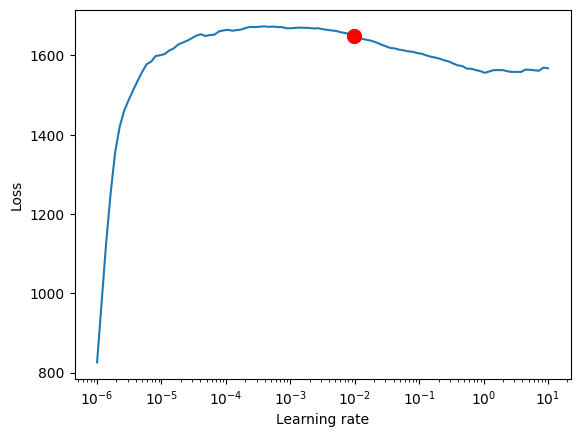

In [22]:
# find optimal learning rate
from lightning.pytorch.tuner import Tuner

res = Tuner(trainer).lr_find(
    tft,
    train_dataloaders=train_dataloader,
    max_lr=10.0,
    min_lr=1e-6,
)

print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

In [25]:
# configure network and trainer
early_stop_callback = EarlyStopping(monitor="train_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger("lightning_logs")  # logging results to a tensorboard

trainer = pl.Trainer(
    max_epochs=50,
    accelerator="cpu",
    enable_model_summary=True,
    gradient_clip_val=0.1,
    limit_train_batches=50,  # coment in for training, running valiation every 30 batches
    # fast_dev_run=True,  # comment in to check that networkor dataset has no serious bugs
    callbacks=[lr_logger, early_stop_callback],
    logger=logger,
)

tft = TemporalFusionTransformer.from_dataset(
    dataset,
    learning_rate=0.008,
    hidden_size=16,
    attention_head_size=2,
    dropout=0.1,
    hidden_continuous_size=8,
    loss=RMSE(),
    log_interval=10,  # uncomment for learning rate finder and otherwise, e.g. to 10 for logging every 10 batches
    optimizer="Ranger",
    reduce_on_plateau_patience=4,
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Number of parameters in network: 22.9k


In [44]:
df_sota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Timestamp          6028 non-null   datetime64[ns]
 1   Hour               6028 non-null   int64         
 2   Day                6028 non-null   int64         
 3   Month              6028 non-null   int64         
 4   Year               6028 non-null   int64         
 5   Cloud_Coverage     6028 non-null   float64       
 6   Visibility         6028 non-null   float64       
 7   Temperature        6028 non-null   float64       
 8   Dew_Point          6028 non-null   float64       
 9   Relative_Humidity  6028 non-null   float64       
 10  Wind_Speed         6028 non-null   float64       
 11  Station_Pressure   6028 non-null   float64       
 12  Altimeter          6028 non-null   float64       
 13  Solar_Energy       6028 non-null   float64       
 14  time_idx

In [26]:
# fit network
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
)

INFO: 
   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | RMSE                            | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 0      | train
3  | prescalers                         | ModuleDict                      | 192    | train
4  | static_variable_selection          | VariableSelectionNetwork        | 528    | train
5  | encoder_variable_selection         | VariableSelectionNetwork        | 7.4 K  | train
6  | decoder_variable_selection         | VariableSelectionNetwork        | 1.2 K  | train
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K  | train
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/training_epoch_loop.py:389: ReduceLROnPlateau conditioned on metric val_loss which is not available but strict is set to `False`. Skipping learning rate update.
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


In [28]:
import pickle

from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

# create study
study = optimize_hyperparameters(
    train_dataloader,
    val_dataloader,
    model_path="optuna_test",
    n_trials=200,
    max_epochs=50,
    gradient_clip_val_range=(0.01, 1.0),
    hidden_size_range=(8, 128),
    hidden_continuous_size_range=(8, 128),
    attention_head_size_range=(1, 4),
    learning_rate_range=(0.001, 0.1),
    dropout_range=(0.1, 0.3),
    trainer_kwargs=dict(limit_train_batches=30),
    reduce_on_plateau_patience=4,
    use_learning_rate_finder=False,  # use Optuna to find ideal learning rate or use in-built learning rate finder
)

# save study results - also we can resume tuning at a later point in time
with open("test_study.pkl", "wb") as fout:
    pickle.dump(study, fout)

# show best hyperparameters
print(study.best_trial.params)

[I 2024-07-01 23:14:37,519] A new study created in memory with name: no-name-a07b98b5-40bc-470f-81b5-94e0b434bbbe
/usr/local/lib/python3.10/dist-packages/pytorch_forecasting/models/temporal_fusion_transformer/tuning.py:124: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gradient_clip_val = trial.suggest_loguniform("gradient_clip_val", *gradient_clip_val_range)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_forecasting/models/temporal_fusion_transformer/tuning.py:148: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/op

KeyError: 'val_loss'

In [29]:
# load the best model according to the validation loss
# (given that we use early stopping, this is not necessarily the last epoch)
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

In [30]:
# calcualte mean absolute error on validation set
predictions = best_tft.predict(val_dataloader, return_y=True, trainer_kwargs=dict(accelerator="cpu"))
RMSE()(predictions.output, predictions.y)

tensor(1504.4993)

In [32]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
raw_predictions = best_tft.predict(val_dataloader, mode="raw", return_x=True)

{'encoder_length': <Figure size 1000x500 with 2 Axes>,
 'time_idx': <Figure size 1000x500 with 2 Axes>,
 'relative_time_idx': <Figure size 1000x500 with 2 Axes>,
 'Solar_Energy': <Figure size 1000x500 with 2 Axes>,
 'Cloud_Coverage': <Figure size 1000x500 with 2 Axes>,
 'Visibility': <Figure size 1000x500 with 2 Axes>,
 'Temperature': <Figure size 1000x500 with 2 Axes>,
 'Dew_Point': <Figure size 1000x500 with 2 Axes>,
 'Relative_Humidity': <Figure size 1000x500 with 2 Axes>,
 'Wind_Speed': <Figure size 1000x500 with 2 Axes>,
 'Station_Pressure': <Figure size 1000x500 with 2 Axes>,
 'Altimeter': <Figure size 1000x500 with 2 Axes>}

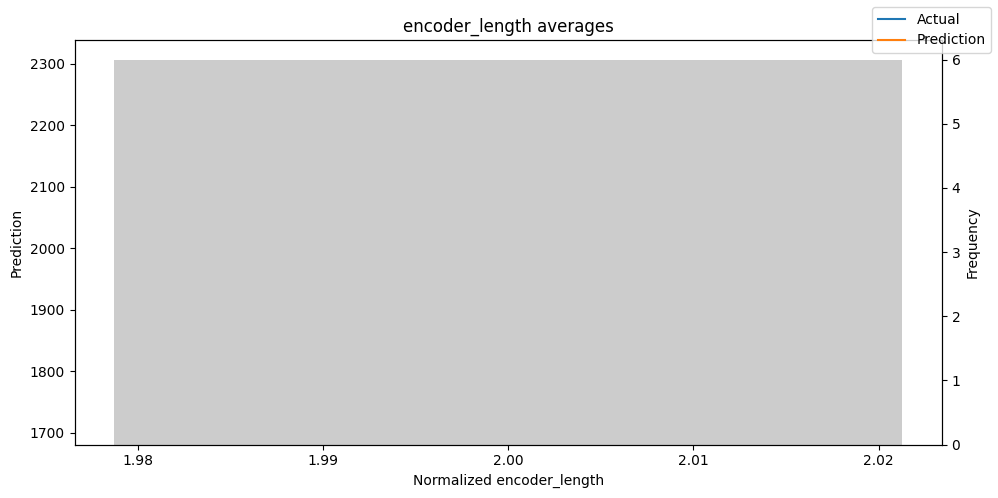

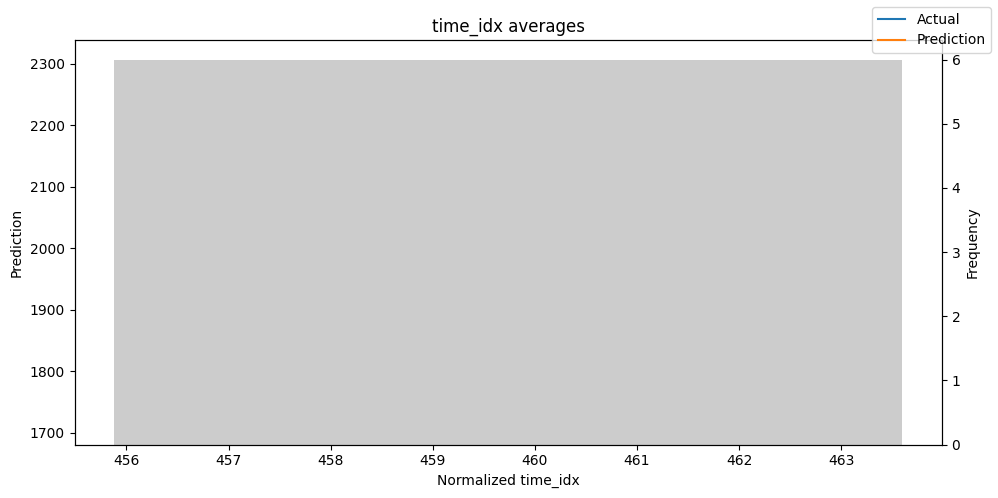

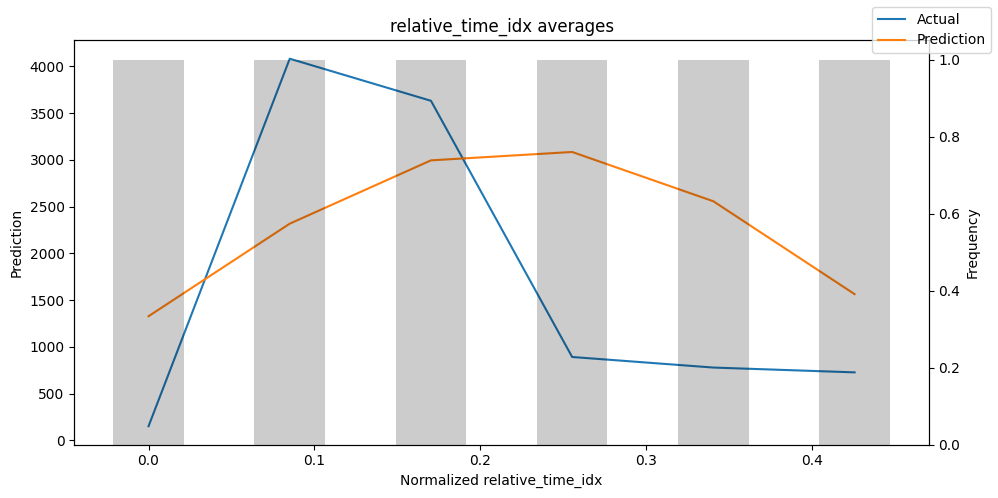

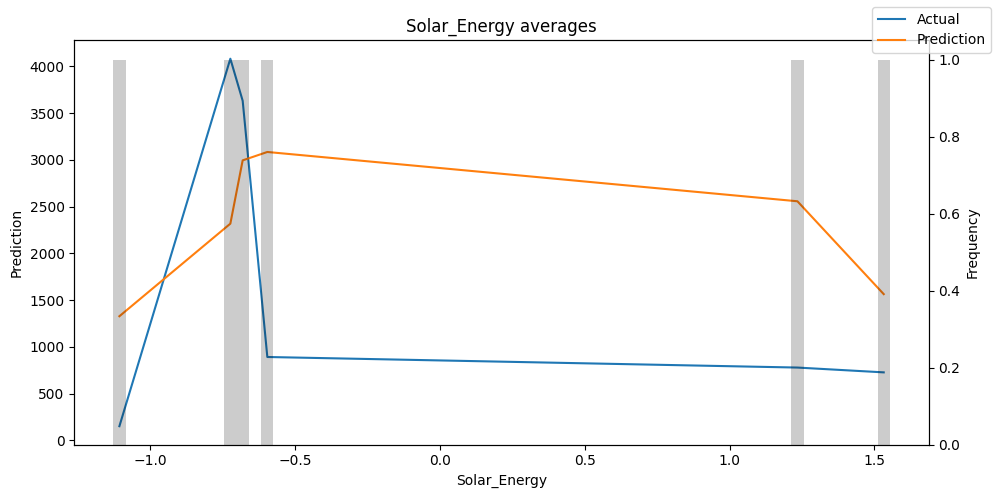

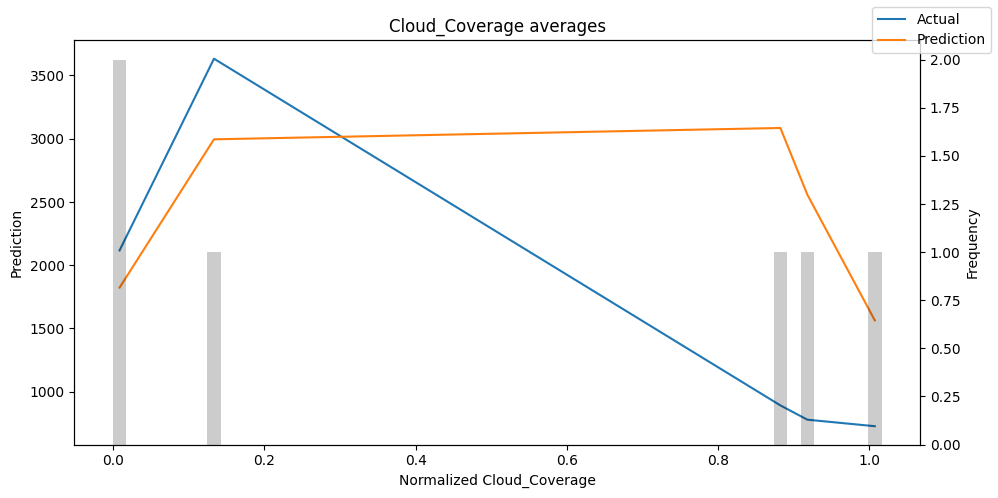

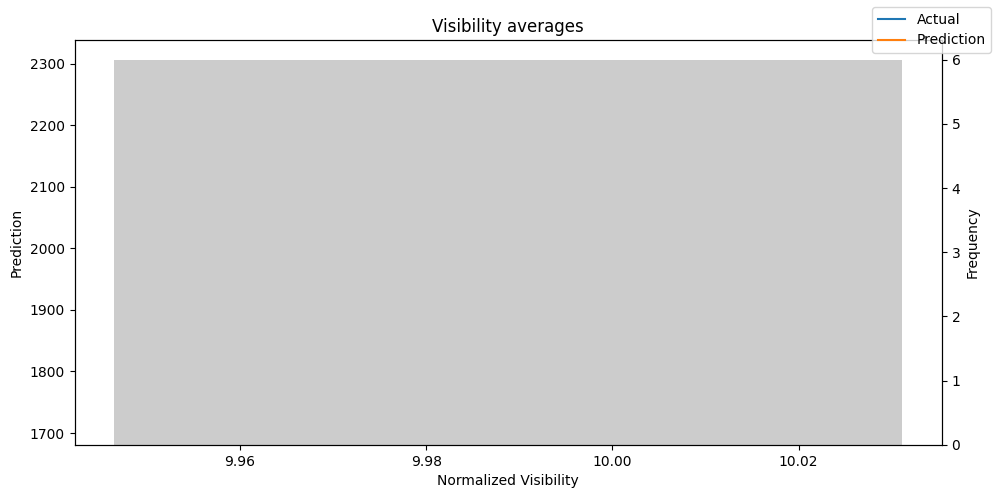

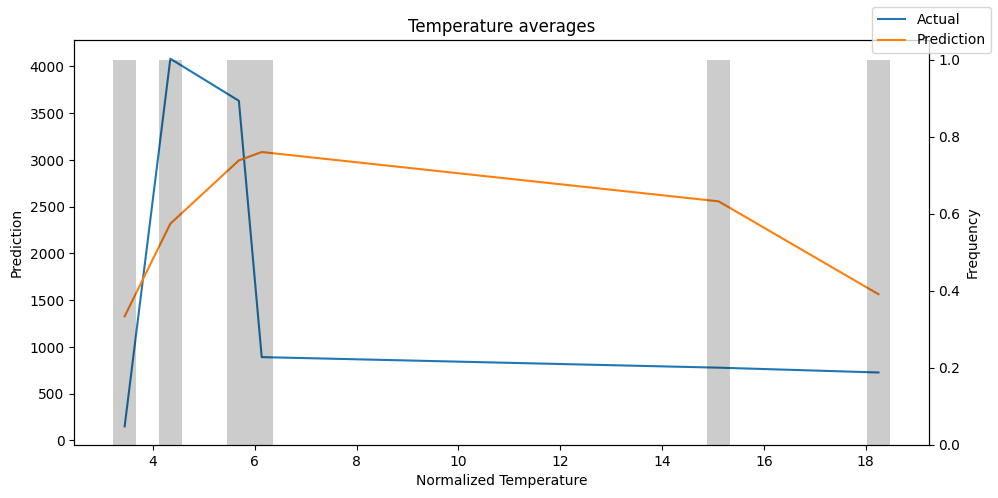

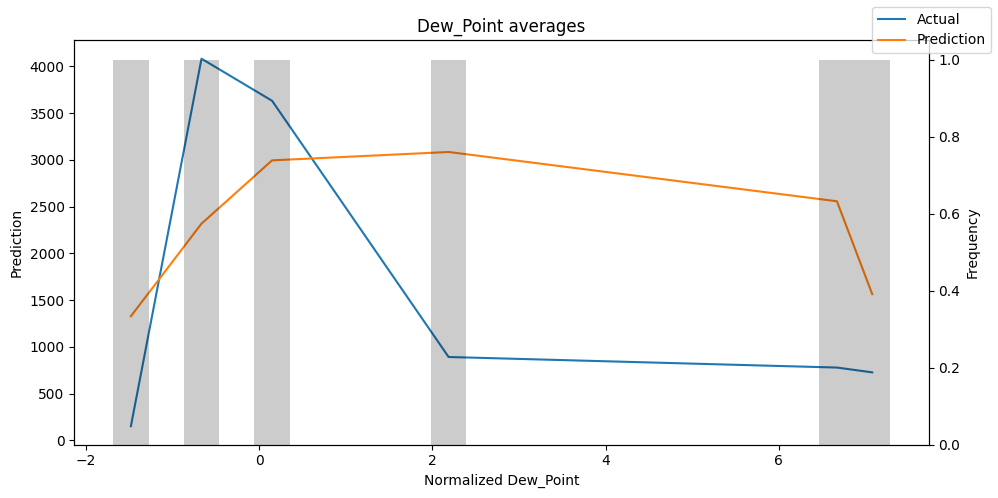

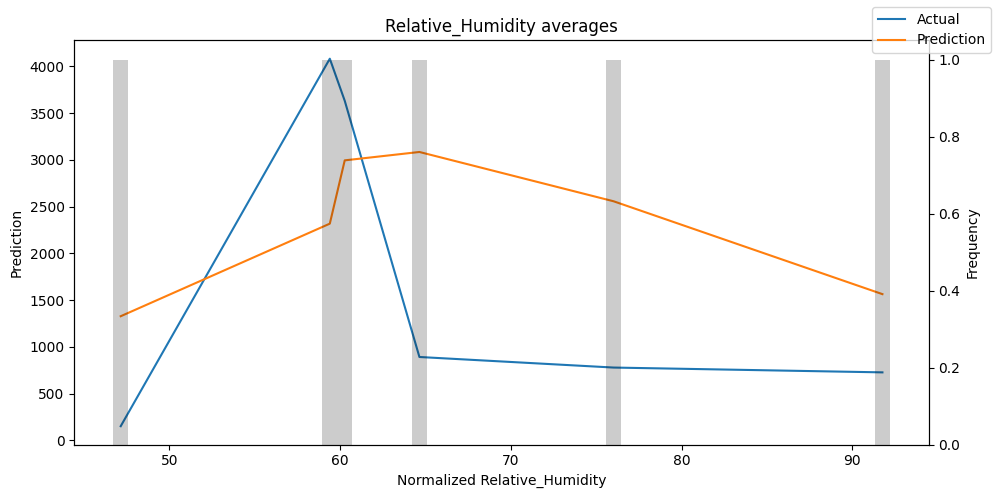

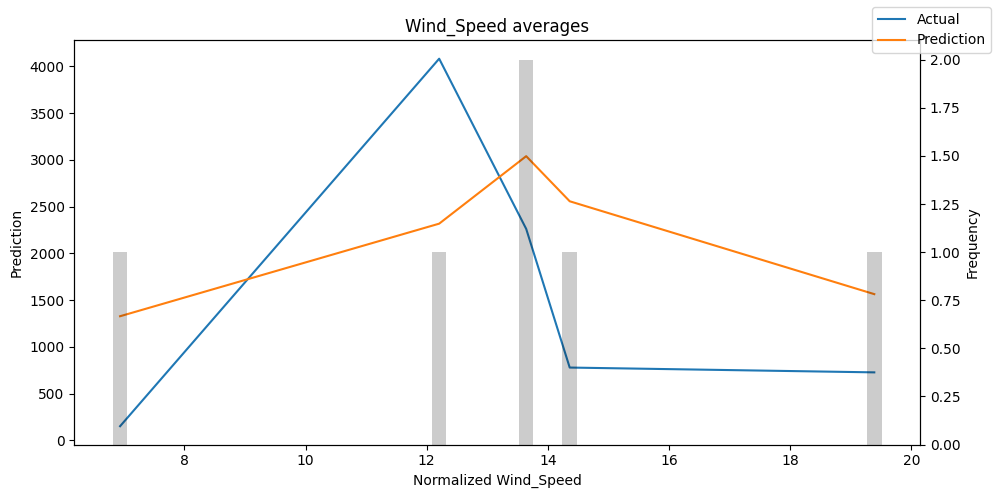

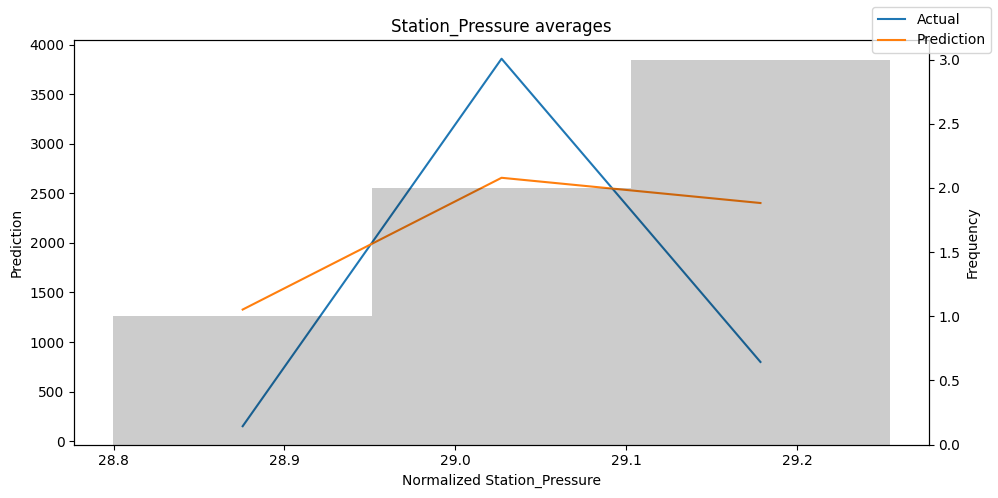

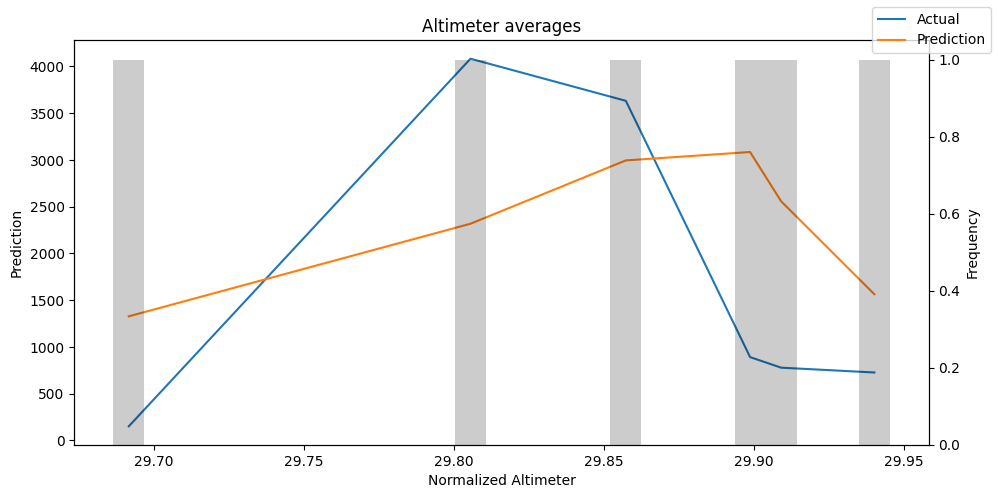

In [35]:
predictions = best_tft.predict(val_dataloader, return_x=True)
predictions_vs_actuals = best_tft.calculate_prediction_actual_by_variable(predictions.x, predictions.output)
best_tft.plot_prediction_actual_by_variable(predictions_vs_actuals)


## Conclusion

- Random breaks in the time series data that are designed to simulte missing values proved to be detrimental to the prediction performance. This is because some of these values (included in the test and validation set) were local minimums or maximums i.e. outliers. Absence of these values in the training data meant that the model could not pick up the patterns in solar energy output in some cases.

- The state-of-the-art Torch Vision Transformer significantly improved MSE by 2 orders of magnitude over the previous best model (10^5 to 10^3).